In [2]:
# 连接数据库
import os
os.environ["CADBPATH"]=os.getcwd() + "/curling_data.db"

import database_functions as db

In [3]:
# 查看表
c = """
SELECT name
FROM sqlite_master
WHERE type = 'table' AND
    name NOT LIKE 'sqlite_%'
"""
db.run_query(c)

,name
0,events
1,games
2,ends
3,shots
4,stone_positions


该数据库包含5个表，分别代表镜头摘要PDF的数据：
* 赛事(events)：例如，2018年冬季奥运会。
* 比赛(games)：例如，包含参加队伍，最终得分等信息。
* 回合(ends)：例如，回合得分，哪支球队取得优势。
* 投掷(shouts)：投掷的信息（例如，哪支球队投掷了它，投掷石头的准确性如何。）
* 冰壶位置(stone_positions)：每次投掷完成后，大本营冰壶的位置。


In [4]:
# 浏览赛事表
c = """
SELECT * FROM events
"""
db.run_query(c)

,id,name,start_date,end_date
0,0,CUR_1819_CWC_1P,WED 12 SEP 2018,SUN 16 SEP 2018
1,1,CUR_1819_CWC_2P,WED 5 DEC 2018,SUN 9 DEC 2018
2,2,CUR_1819_CWC_3P,WED 30 JAN 2019,SUN 3 FEB 2019
3,3,CUR_1819_CWC_4P,WED 8 MAY 2019,SUN 12 MAY 2019
4,4,CUR_ECC2016P,SAT 19 NOV 2016,SAT 26 NOV 2016
5,5,CUR_ECCA2017P,SAT 18 NOV 2017,SAT 25 NOV 2017
6,6,CUR_ECCA2018P,SAT 17 NOV 2018,SAT 24 NOV 2018
7,7,CUR_ECCB2017P,FRI 24 NOV 2017,FRI 24 NOV 2017
8,8,CUR_OQE2017P,TUE 5 DEC 2017,SUN 10 DEC 2017
9,9,CUR_PACC2017B,FRI 3 NOV 2017,SAT 4 NOV 2017


赛事事件表非常简单，包括事件名称（以世界冰壶联盟存储的文件名命名），相关赛事的开始和结束日期（通过获取PDF中的时间获得）。

In [5]:
# 浏览比赛表

c = """
SELECT * FROM games
"""
db.run_query(c)

,id,event_id,session,name,sheet,type,start_date,start_time,team_red,team_yellow,final_score_red,final_score_yellow
0,0,0,03~Session_3,Group-B,C,Men,WED 12 SEP 2018,21:00,CAN,SUI,NaN,NaN
1,1,0,03~Session_3,Group-A,B,Men,WED 12 SEP 2018,21:00,NOR,CHN,NaN,NaN
2,2,0,03~Session_3,Group-B,D,Men,WED 12 SEP 2018,21:00,SCO,JPN,NaN,NaN
3,3,0,03~Session_3,Group-A,A,Men,WED 12 SEP 2018,21:00,SWE,USA,NaN,NaN
4,4,0,05~Session_5,Group-B,A,Men,THU 13 SEP 2018,12:00,CAN,SCO,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1264,1264,23,08~Session_8,Round Robin Session 8,C,Women,FRI 3 FEB 2017,19:00,KOR,CAN,2.0,8.0
1265,1265,23,09~Session_9,Round Robin Session 9,B,Women,SAT 4 FEB 2017,14:00,KOR,GER,8.0,4.0
1266,1266,23,50~Tie-breaker,Tie-breaker Session,E,Women,SUN 5 FEB 2017,9:00,SUI,GBR,6.0,4.0
1267,1267,23,98~Bronze_Medal_Game,None,None,Women,MON 6 FEB 2017,16:00,SWE,SUI,6.0,3.0


比赛表要大得多，其中包含事件表中24个赛事中进行的1269场比赛的数据。


In [20]:
# 查看每列，排查可能丢失数据的位置。
c = """ 
SELECT session, COUNT(*) FROM games
GROUP BY session
"""
db.run_query(c)

,session,COUNT(*)
0,01~Session_1,72
1,01~Session_2,1
2,02~Bronze_Medal_Game,1
3,02~Session_1,15
4,02~Session_2,53
...,...,...
125,93~Semi-Finals,5
126,93~Semi-Finals_Session_1,5
127,97~Finals,4
128,98~Bronze_Medal_Game,6


可以看出命名方法不尽相同，目前不在此处进行任何更改。

In [21]:
# 检查有无NaN或None条目，确定数据是如从文件夹名称中提取的。
c = """ 
SELECT session, name, COUNT(*) FROM games
WHERE name = 'None'
GROUP BY session
"""
db.run_query(c)

,name,COUNT(*)
0,Bronze Medal Game,9
1,Final,4
2,Finals,4
3,Gold Medal Game,10
4,Group-A,87
5,Group-B,74
6,None,35
7,Page Play-off 1v2,3
8,Page Play-off 3v4,3
9,Page Play-offs,4


“半决赛”和“决赛”的命名方式上出现一些不一致，因为一些PDF文件不是标准格式（有些比赛分为“ A组”和“ B组”）。

In [22]:
# 35个“None”的条目，它们来自哪里
c = """ 
SELECT session, name, COUNT(*) FROM games
WHERE name = 'None'
GROUP BY session
"""
db.run_query(c)

,session,name,COUNT(*)
0,15~Play-Off_1,None,1
1,16~Play-Off_1,None,1
2,17~Finals,None,2
3,17~Play-Off_2,None,1
4,18~Finals,None,2
5,18~Play-Off_2,None,1
6,20~Finals,None,1
7,21~Bronze_Medal_Game,None,1
8,21~Finals,None,3
9,22~Finals,None,1


从上可以看出，有些“决赛前”的命名比赛的文件，使“populate_db.py“返回“ None”。目前暂时无法使用此字段。

In [23]:
c = """ 
SELECT sheet, COUNT(*) FROM games
GROUP BY sheet
"""
db.run_query(c)

,sheet,COUNT(*)
0,A,267
1,B,298
2,C,308
3,D,273
4,E,88
5,None,35


大部分比赛都有合理的可用sheet

In [24]:
c = """ 
SELECT session, sheet, COUNT(*) FROM games
WHERE sheet = 'None'
GROUP BY session
"""
db.run_query(c)

,session,sheet,COUNT(*)
0,15~Play-Off_1,None,1
1,16~Play-Off_1,None,1
2,17~Finals,None,2
3,17~Play-Off_2,None,1
4,18~Finals,None,2
5,18~Play-Off_2,None,1
6,20~Finals,None,1
7,21~Bronze_Medal_Game,None,1
8,21~Finals,None,3
9,22~Finals,None,1


影响name字段的同一问题。但是，受影响的比赛数量很少（1269件中有35件）

In [25]:
c = """ 
SELECT type, COUNT(*) FROM games
GROUP BY type
"""
db.run_query(c)

,type,COUNT(*)
0,Men,665
1,Women,604


男子比赛数量较女子多10%

In [26]:
# 检验比赛日期
c = """ 
SELECT start_date, COUNT(*) FROM games
GROUP BY start_date
"""
db.run_query(c)

,start_date,COUNT(*)
0,FRI 3 FEB 2017,3
1,FRI 7 APR 2017,1
2,FRI 8 APR 2016,1
3,FRI 1 FEB 2019,12
4,FRI 10 MAY 2019,12
...,...,...
155,WED 6 DEC 2017,14
156,WED 7 MAR 2018,2
157,WED 7 NOV 2018,11
158,WED 8 MAY 2019,8


日期很多，因为2010年之前并没有比赛，所以在该查询中添加条件，该字段必须包含“ 201？”（即包含年份），可以检查数据，确保它们都是有效的。

In [27]:
# 加入限制条件，可以检查比赛开始日期是否有异常
c = """ 
SELECT start_date, COUNT(*) FROM games
WHERE start_date LIKE '% 201%'
GROUP BY start_date
"""
db.run_query(c)

,start_date,COUNT(*)
0,FRI 3 FEB 2017,3
1,FRI 7 APR 2017,1
2,FRI 8 APR 2016,1
3,FRI 1 FEB 2019,12
4,FRI 10 MAY 2019,12
...,...,...
155,WED 6 DEC 2017,14
156,WED 7 MAR 2018,2
157,WED 7 NOV 2018,11
158,WED 8 MAY 2019,8


行数没有改变，因此是合理的

In [6]:
# 检查比赛开始时间
c = """ 
SELECT start_time, COUNT(*) FROM games
GROUP BY start_time
"""
db.run_query(c)

,start_time,COUNT(*)
0,10:00,8
1,12:00,77
2,12:30,1
3,13:00,9
4,13:30,34
5,14:00,245
6,14:05,29
7,15:00,28
8,15:35,2
9,16:00,68


比赛开始时间看起来没有问题

In [7]:

c = """ 
SELECT team_red, COUNT(*) FROM games
GROUP BY team_red
"""
db.run_query(c)

,team_red,COUNT(*)
0,AUS,9
1,AUT,10
2,CAN,94
3,CAN1,3
4,CAN2,3
5,CHN,74
6,CZE,34
7,DEN,58
8,FIN,31
9,GBR,11


In [8]:
c = """ 
SELECT team_yellow, COUNT(*) FROM games
GROUP BY team_yellow
"""
db.run_query(c)

,team_yellow,COUNT(*)
0,AUS,9
1,AUT,9
2,CAN,89
3,CAN1,3
4,CAN2,4
5,CHN,76
6,CZE,33
7,DEN,54
8,FIN,35
9,GBR,16


加拿大有两支队伍

In [9]:
# 检查最终得分（red）
c = """ 
SELECT final_score_red, COUNT(*) FROM games
GROUP BY final_score_red
"""
db.run_query(c)


,final_score_red,COUNT(*)
0,NaN,169
1,0.0,4
2,1.0,19
3,2.0,57
4,3.0,107
5,4.0,107
6,5.0,129
7,6.0,160
8,7.0,154
9,8.0,162


In [10]:
c = """ 
SELECT final_score_yellow, COUNT(*) FROM games
GROUP BY final_score_yellow
"""
db.run_query(c)


,final_score_yellow,COUNT(*)
0,NaN,169
1,0.0,3
2,1.0,19
3,2.0,52
4,3.0,85
5,4.0,113
6,5.0,141
7,6.0,156
8,7.0,171
9,8.0,152


在这里，我们看到这两个表中的第一行都是169个NaN

In [11]:
c = """ 
SELECT final_score_red, final_score_yellow, COUNT(*) FROM games
WHERE final_score_yellow IS NULL
GROUP BY final_score_red
"""
db.run_query(c)

,final_score_red,final_score_yellow,COUNT(*)
0,None,None,169


有169场比赛缺失最终得分（原始PDF中缺失）；有一场比赛999代表赢，0代表输，所以会出现999

In [12]:
c = """
SELECT * FROM ends
"""
db.run_query(c)

,id,game_id,number,direction,color_hammer,score_red,score_yellow,time_left_red,time_left_yellow
0,0,0,1,1,red,NaN,NaN,NaN,NaN
1,1,0,2,0,yellow,NaN,NaN,NaN,NaN
2,2,0,3,1,yellow,NaN,NaN,NaN,NaN
3,3,0,4,0,red,NaN,NaN,NaN,NaN
4,4,0,5,1,yellow,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11467,11467,1268,5,1,yellow,1.0,5.0,1353.0,1299.0
11468,11468,1268,6,0,red,1.0,5.0,1251.0,1149.0
11469,11469,1268,7,1,red,3.0,5.0,1043.0,891.0
11470,11470,1268,8,0,yellow,3.0,6.0,724.0,699.0


某些赛事缺少得分和剩余时间

In [14]:
# 开始检查ends表数据
c = """
select number, count(*) from ends
group by number
"""
db.run_query(c)

,number,count(*)
0,1,1269
1,2,1269
2,3,1269
3,4,1269
4,5,1269
5,6,1268
6,7,1169
7,8,1067
8,9,837
9,10,673


number字段（页数）是从PDF中提取的，一局（ends）刚好对应一页PDF，一般比赛有10局（ends)，但偶尔会有附加赛，因此数据较为合理。

In [15]:
c = """ 
SELECT direction, COUNT(*) FROM ends
GROUP BY direction
"""
db.run_query(c)

,direction,COUNT(*)
0,0,5580
1,1,5892


大本营在上方和下方的频率基本相同，因此数据合理，坐标系原点在大本营中心

In [16]:
c = """ 
SELECT color_hammer, COUNT(*) FROM ends
GROUP BY color_hammer
"""
db.run_query(c)

,color_hammer,COUNT(*)
0,error_color,11
1,red,5724
2,yellow,5737


后手优势

In [17]:
c = """
SELECT events.name, games.session, games.team_red, games.team_yellow, games.type, ends.number FROM games
INNER JOIN events ON events.id = games.event_id
INNER JOIN ends ON ends.game_id = games.id
WHERE ends.color_hammer = 'error_color'
"""
db.run_query(c)

,name,session,team_red,team_yellow,type,number
0,CUR_ECCA2017P,10~Session_5,ITA,HUN,Women,7
1,CUR_WJCC2017P,10~Session_10,TUR,CAN,Men,3
2,CUR_WJCC2017P,10~Session_10,TUR,CAN,Men,4
3,CUR_WJCC2017P,10~Session_10,TUR,CAN,Men,5
4,CUR_WJCC2017P,10~Session_10,TUR,CAN,Men,6
5,CUR_WJCC2017P,10~Session_10,TUR,CAN,Men,7
6,CUR_WMCC2017P,13~Session_13,ITA,SUI,Men,9
7,CUR_WWCC2017P,09~Session_9,RUS,GER,Women,8
8,CUR_WWCC2017P,09~Session_9,RUS,GER,Women,9
9,CUR_WWCC2018P,02~Session_2,SUI,CAN,Women,2


程序依靠底部剩余冰壶数量来判断color_hammer，无法识别是因为种种奇怪的原因，比如CUR_ECCA2017P底部被一个黄色的冰壶挡住了，应该是比赛记录者的失误

In [18]:
c = """ 
SELECT score_red, COUNT(*) FROM ends
GROUP BY score_red
"""
db.run_query(c)

,score_red,COUNT(*)
0,NaN,2865
1,0.0,1113
2,1.0,1120
3,2.0,1298
4,3.0,1272
5,4.0,1069
6,5.0,874
7,6.0,706
8,7.0,518
9,8.0,333


In [19]:
c = """ 
SELECT score_yellow, COUNT(*) FROM ends
GROUP BY score_yellow
"""
db.run_query(c)

,score_yellow,COUNT(*)
0,NaN,2865
1,0.0,949
2,1.0,1165
3,2.0,1361
4,3.0,1249
5,4.0,1031
6,5.0,981
7,6.0,704
8,7.0,547
9,8.0,309


30%的ends没有提供得分，老问题

In [20]:
c = """ 
SELECT time_left_red, COUNT(*) FROM ends
GROUP BY time_left_red
"""
db.run_query(c)

,time_left_red,COUNT(*)
0,NaN,2865
1,0.0,5343
2,3.0,2
3,4.0,2
4,5.0,1
...,...,...
1576,2255.0,1
1577,2259.0,1
1578,2269.0,1
1579,2270.0,1


In [21]:
c = """ 
SELECT time_left_yellow, COUNT(*) FROM ends
GROUP BY time_left_yellow
"""
db.run_query(c)

,time_left_yellow,COUNT(*)
0,NaN,2865
1,0.0,5343
2,1.0,1
3,3.0,1
4,4.0,2
...,...,...
1595,2253.0,1
1596,2268.0,1
1597,2272.0,1
1598,2275.0,1


80%PDF上此字段缺失

In [22]:
c = """ 
SELECT * from shots
"""
db.run_query(c)

,id,end_id,number,color,team,player_name,type,turn,percent_score
0,0,0,1,yellow,SUI,TANNER V,Front,counterclockwise,100
1,1,0,2,red,CAN,HEBERT B,Draw,counterclockwise,75
2,2,0,3,yellow,SUI,TANNER V,Hit and Roll,counterclockwise,50
3,3,0,4,red,CAN,HEBERT B,Draw,counterclockwise,100
4,4,0,5,yellow,SUI,DE CRUZ P,Draw,counterclockwise,75
...,...,...,...,...,...,...,...,...,...
182770,182770,11471,12,red,RUS,VASILEVA U,Double Take-out,counterclockwise,50
182771,182771,11471,13,yellow,CAN,ROCQUE K,Double Take-out,clockwise,50
182772,182772,11471,14,red,RUS,MOISEEVA V,Double Take-out,counterclockwise,50
182773,182773,11471,15,yellow,CAN,ROCQUE K,Draw,clockwise,100


In [23]:
c = """ 
SELECT number, COUNT(*) from shots
GROUP BY number
"""
db.run_query(c)

,number,COUNT(*)
0,1,11472
1,2,11472
2,3,11459
3,4,11458
4,5,11458
5,6,11457
6,7,11456
7,8,11455
8,9,11454
9,10,11454


16次投壶对应着number

In [24]:
# 投壶次数小于10次的比赛
c = """
WITH shot_counts AS(
    SELECT end_id, COUNT(end_id) AS shot_counts FROM shots
    GROUP BY end_id
    HAVING shot_counts < 10
)
SELECT events.name, games.type, games.session, games.team_red, games.team_yellow, ends.number, shot_counts.shot_counts FROM games
INNER JOIN events ON events.id = games.event_id
INNER JOIN ends ON ends.game_id = games.id
INNER JOIN shot_counts ON shot_counts.end_id = ends.id
"""
db.run_query(c)

,name,type,session,team_red,team_yellow,number,shot_counts
0,CUR_1819_CWC_1P,Men,09~Session_9,USA,SWE,9,2
1,CUR_1819_CWC_3P,Men,04~Session_4,NOR,SCO,9,2
2,CUR_1819_CWC_3P,Men,06~Session_6,SWE,SUI,9,2
3,CUR_1819_CWC_3P,Men,08~Session_8,SCO,CAN,9,2
4,CUR_1819_CWC_3P,Men,10~Session_10,USA,SWE,9,2
5,CUR_1819_CWC_3P,Women,09~Session_9,RUS,CHN,9,2
6,CUR_1819_CWC_3P,Women,10~Session_10,USA,SCO,9,2
7,CUR_1819_CWC_3P,Women,12~Session_12,SCO,JPN,9,2
8,CUR_1819_CWC_3P,Women,14~Session_14,JPN,USA,9,2
9,CUR_1819_CWC_4P,Men,03~Session_3,USA,CAN1,9,2


回查PDF，每一比赛都有特定原因，因此数据比较合理

In [25]:
c = """ 
SELECT color, COUNT(*) from shots
GROUP BY color
"""
db.run_query(c)

,color,COUNT(*)
0,red,91386
1,yellow,91389


这一次没有error_color,这是因为队伍颜色的判定方法只是提取第一局的冰壶颜色，而第一局刚好没有出错的情况

In [26]:
c = """ 
SELECT team, COUNT(*) from shots
GROUP BY team
"""
db.run_query(c)

,team,COUNT(*)
0,AUS,1292
1,AUT,1303
2,CAN,12744
3,CAN1,384
4,CAN2,415
5,CHN,10529
6,CZE,5081
7,DEN,8333
8,FIN,4770
9,GBR,2099


In [27]:
c = """ 
SELECT player_name, COUNT(*) from shots
GROUP BY player_name
"""
db.run_query(c)

,player_name,COUNT(*)
0,ABBES E,697
1,ABE S,166
2,ADAMS V,958
3,AITA K,8
4,AITKEN G,57
...,...,...
667,ZHOU Y,516
668,ZHUZBAY A,172
669,ZIOLO T,14
670,ZOU D,286


642-644
642	WRANA R	190
643	WRANAA I	316
644	WRANAA R	1319
拼写错误，大E了

In [28]:
c = """ 
SELECT type, COUNT(*) from shots
GROUP BY type
"""
db.run_query(c)

,type,COUNT(*)
0,Clearing,16609
1,Double Take-out,10354
2,Draw,57199
3,Freeze,1434
4,Front,18719
5,Guard,10980
6,Hit and Roll,14656
7,None,4806
8,Promotion Take-out,5049
9,Raise,5531


关于缺失：有些无统计，有些是无；另外guard和front应该是一个意思through和Through也不应该区分大小写

In [29]:
c = """ 
SELECT turn, COUNT(*) from shots
GROUP BY turn
"""
db.run_query(c)

,turn,COUNT(*)
0,Free guard zone violation,2
1,Hogline violation,1
2,In,4615
3,Measurement,8
4,None,4806
5,Out,5690
6,Run out of time,1
7,clockwise,79453
8,counterclockwise,88198
9,picked up debris,1


In/out:将冰壶旋转方向与运动员的利手结合的一种表达方式，对于右利手运动员：顺时针=in，逆时针=out；对于左利手相反

In [30]:
c = """ 
SELECT percent_score, COUNT(*) from shots
GROUP BY percent_score
"""
db.run_query(c)

,percent_score,COUNT(*)
0,0,17425
1,25,2787
2,50,23742
3,75,22909
4,100,110022
5,None,5890


冰壶裁判的打分0-4分换算成百分比。none代表没有统计，国际水平赛事满分的投掷次数很多。

In [31]:
# 冰壶位置表
c = """
SELECT * FROM stone_positions
"""
db.run_query(c)

,id,shot_id,color,x,y
0,0,0,yellow,21.000000,210.5
1,1,1,red,6.043912,-12.0
2,2,1,yellow,21.471318,210.0
3,3,2,yellow,21.471318,210.0
4,4,2,yellow,104.043912,-86.0
...,...,...,...,...,...
699520,699520,182774,red,14.543524,123.0
699521,699521,182774,red,-114.000000,69.0
699522,699522,182774,red,-77.000000,-97.5
699523,699523,182774,yellow,-58.000000,-88.5


In [32]:
c = """ 
SELECT color, COUNT(*) from stone_positions
GROUP BY color
"""
db.run_query(c)

,color,COUNT(*)
0,red,354780
1,yellow,344745


黄色冰壶数量比红色少3%，可能有识别问题

In [33]:
# 将冰壶位置出现地点做一个热度图
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
c = """
SELECT x, y FROM stone_positions
"""
pos_df = db.run_query(c)
pos_df

,x,y
0,21.000000,210.5
1,6.043912,-12.0
2,21.471318,210.0
3,21.471318,210.0
4,104.043912,-86.0
...,...,...
699520,14.543524,123.0
699521,-114.000000,69.0
699522,-77.000000,-97.5
699523,-58.000000,-88.5


In [35]:
pos_df.dtypes

x    float64
y    float64
dtype: object

In [36]:
pos_df.describe()

,x,y
count,699525.000000,699525.000000
mean,-0.462715,76.171190
std,57.897540,111.058087
min,-142.000000,-129.500000
25%,-35.000000,-5.500000
50%,0.000000,59.000000
75%,33.500000,154.000000
max,142.000000,432.000000


x轴范围是-142到142，y的范围是-129到432

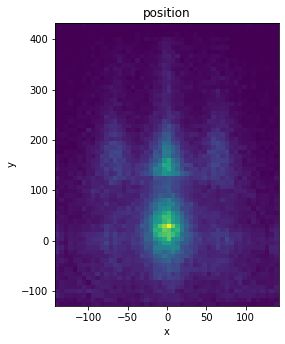

In [42]:
fig = plt.figure(figsize=(4,5.2))
plt.hist2d(pos_df["x"], pos_df["y"], bins=(50,65))
plt.title('position')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [44]:
c = """
SELECT end_id,team,count(player_name) from shots
GROUP BY end_id,team
HAVING count(player_name) < 8
order by end_id,team"""

db.run_query(c)

,end_id,team,count(player_name)
0,7,SUI,7
1,15,NOR,7
2,83,SCO,7
3,99,SWE,1
4,99,USA,1
...,...,...,...
450,11319,USA,7
451,11337,NOR,7
452,11403,CHN,7
453,11424,SUI,7


In [45]:
c ="""SELECT * from shots
where end_id IN
(SELECT end_id from shots
GROUP BY end_id
HAVING count(1) < 16)"""
db.run_query(c)

,id,end_id,number,color,team,player_name,type,turn,percent_score
0,112,7,1,red,CAN,HEBERT B,Draw,clockwise,100
1,113,7,2,yellow,SUI,TANNER V,Front,clockwise,100
2,114,7,3,red,CAN,HEBERT B,Draw,clockwise,75
3,115,7,4,yellow,SUI,TANNER V,Front,clockwise,100
4,116,7,5,red,CAN,FLASCH C,Draw,clockwise,100
...,...,...,...,...,...,...,...,...,...
4082,182466,11452,11,red,SUI,STERN E,Take-out,clockwise,100
4083,182467,11452,12,yellow,GBR,KERR R,Draw,counterclockwise,75
4084,182468,11452,13,red,SUI,HUERLIMANN B,Clearing,counterclockwise,100
4085,182469,11452,14,yellow,GBR,AITKEN G,Hit and Roll,counterclockwise,75
